In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis

#### Load atp data

In [2]:
# Read in all files in training folder
filepath = 'data/training/'
filenames = glob.glob(filepath + '*.csv')
li = []

for filename in filenames:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [4]:
df.shape

(170534, 49)

In [5]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968-2029,Dublin,Grass,32,A,19680708,270,202866,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-2029,Dublin,Grass,32,A,19680708,271,126914,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-2029,Dublin,Grass,32,A,19680708,272,209523,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-2029,Dublin,Grass,32,A,19680708,273,100084,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-2029,Dublin,Grass,32,A,19680708,274,100132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,loser_id,loser_seed,loser_ht,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,170534.000000,1.705340e+05,170534.000000,170534.000000,64496.000000,151206.000000,168466.000000,170534.000000,32206.000000,138876.000000,...,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,79853.000000,129263.000000,97835.000000,126248.000000,96123.000000
mean,52.442879,1.992028e+07,56.388544,102256.213576,6.169065,184.212551,25.588722,102980.663786,7.559958,184.022805,...,47.590072,31.561094,15.013049,12.139181,4.809124,8.765131,82.288574,1236.902295,121.553799,776.547028
std,36.008932,1.381301e+05,86.218280,4286.716603,5.340599,6.594099,3.946574,8067.762127,5.827926,6.598407,...,19.345556,14.400378,7.259399,4.104211,3.270339,4.122337,127.816820,1642.098794,167.651710,927.565064
min,2.000000,1.968012e+07,1.000000,100002.000000,1.000000,160.000000,14.351814,100001.000000,1.000000,160.000000,...,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,32.000000,1.980053e+07,9.000000,100395.000000,2.000000,180.000000,22.757016,100461.000000,4.000000,180.000000,...,34.000000,21.000000,10.000000,9.000000,2.000000,6.000000,19.000000,419.000000,39.000000,299.000000
50%,32.000000,1.992021e+07,22.000000,101475.000000,5.000000,185.000000,25.223819,101659.000000,6.000000,183.000000,...,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000,48.000000,770.000000,76.000000,575.000000
75%,64.000000,2.004012e+07,47.000000,103498.000000,8.000000,188.000000,28.084873,103739.000000,10.000000,188.000000,...,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000,95.000000,1410.000000,130.000000,938.000000
max,128.000000,2.017112e+07,599.000000,209831.000000,35.000000,208.000000,58.718686,209846.000000,35.000000,208.000000,...,328.000000,284.000000,101.000000,91.000000,28.000000,35.000000,2101.000000,16950.000000,2159.000000,16950.000000


We will have to handle a lot of missing values. Indeed, we can expect years before 2000 to miss match statistics because technologies were not yet created

#### Surface

In [7]:
df.groupby('surface').size()

surface
Carpet    20283
Clay      62083
Grass     19743
Hard      65788
dtype: int64

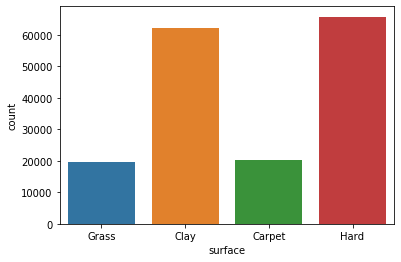

In [8]:
sns.countplot(x="surface", data=df)
plt.show()

A majority of matches are on Clay, and Hard surfaces. Carpet is an old surface, not played now. So we'll have to remove matches on this surface

#### Tourney level

Meaning of codes are:
- A: All normal tournaments as ATP250 and ATP500 including qualification. Olympics are in this category as well but will be filtered out
- C: Challenger tournaments
- D: Davis Cup matches
- F: Masters and Next Gen Finals
- G: Grand Slam tournaments
- M: ATP Masters 1000 tournaments

In [9]:
df.groupby('tourney_level').size()

tourney_level
A    111936
C       125
D     13433
F       427
G     24109
M     20504
dtype: int64

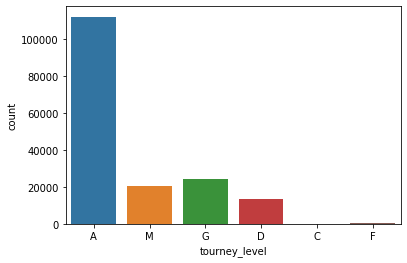

In [10]:
sns.countplot(x="tourney_level", data=df)
plt.show()

Tourney levels seems to be accurate compared to reality.

#### Round

In [11]:
df.groupby('round').size()

round
BR          8
ER         32
F        3901
QF      15118
R128    13525
R16     29800
R32     56108
R64     29204
RR      15146
SF       7692
dtype: int64

Meaning of codes are:
- BR: Bronze medal match in Olympics and Next Gen Finals
- F: Final
- Q1: Qualification round 1
- Q2: Qualification round 2
- Q3: Qualification round 3
- QF: Quarter-final
- R128: Round of 128
- R16: Round of 16
- R32: Round of 32
- R64: Round of 64
- RR: Round robin. All player meet each other in group.
- SF: Semi-final

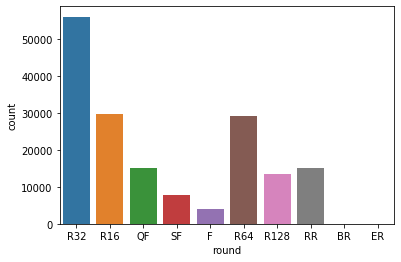

In [12]:
sns.countplot(x="round", data=df)
plt.show()

In [13]:
df[df['round'] == "ER"].groupby(['tourney_id', 'tourney_name']).size()

tourney_id  tourney_name
2007-339    Adelaide        8
2007-433    Las Vegas       8
2007-499    Delray Beach    8
2007-506    Buenos Aires    8
dtype: int64

In [14]:
df.iloc[139436][['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level', 'round', 'match_num', 'tourney_date', 'winner_id', 'loser_id', 'winner_name', 'loser_name', 'score']]

tourney_id               2007-506
tourney_name         Buenos Aires
surface                      Clay
draw_size                      32
tourney_level                   A
round                          ER
match_num                     502
tourney_date             20070219
winner_id                  103808
loser_id                   103151
winner_name        Potito Starace
loser_name       Mariano Zabaleta
score                  7-6(9) 6-2
Name: 139436, dtype: object

After checking on ATP tour website, we can tell that ER seems to be the same as RR

Almost every tournament starts with R32, we can see that number of matches is approximately divided by 2 after each round, which seems coherent

#### Tourney ID

In [15]:
df.groupby(['tourney_id', 'tourney_name']).size()

tourney_id  tourney_name      
1968-2029   Dublin                31
1968-303    Buenos Aires          36
1968-311    London                62
1968-314    Gstaad                31
1968-319    Kitzbuhel             31
                                  ..
2017-M016   Eastbourne            27
2017-M020   Brisbane              27
2017-M021   Madrid Masters        55
2017-M024   Cincinnati Masters    55
2017-M035   Washington            47
Length: 7346, dtype: int64

tourney_id is composed of year - tourney ID which is persistent across years

In [16]:
df[df['tourney_name'] == "Eastbourne"].groupby('tourney_id').size()

tourney_id
1970-2049    28
1971-2049    39
1972-2049    29
1973-2049    31
2009-741     31
2010-741     31
2011-741     31
2012-741     27
2013-741     27
2014-741     27
2017-M016    27
dtype: int64

Create year feature to check for missing values

In [17]:
main_df = df.copy()

In [26]:
main_df['tourney_year'] = df['tourney_id'].str.split(pat='-').str.get(0).astype(int)

In [27]:
main_df.drop('tourney_year', axis=1).isna().groupby(main_df['tourney_year'], sort=False).sum().reset_index()

,tourney_year,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,1968,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,906.0,...,1304.0,1304.0,1304.0,1304.0,1304.0,1304.0,1304.0,1304.0,1304.0,1304.0
1,1969,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,1476.0,...,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0,2010.0
2,1970,0.0,0.0,124.0,0.0,0.0,0.0,0.0,0.0,2018.0,...,2582.0,2582.0,2582.0,2582.0,2582.0,2582.0,2582.0,2582.0,2582.0,2582.0
3,1971,0.0,0.0,235.0,0.0,0.0,0.0,0.0,0.0,2931.0,...,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0,3361.0
4,1972,0.0,0.0,421.0,0.0,0.0,0.0,0.0,0.0,2896.0,...,3318.0,3318.0,3318.0,3318.0,3318.0,3318.0,3318.0,3318.0,3318.0,3318.0
5,1973,0.0,0.0,377.0,0.0,0.0,0.0,0.0,0.0,3316.0,...,4124.0,4124.0,4124.0,4124.0,4124.0,4124.0,3733.0,3733.0,3821.0,3821.0
6,1974,0.0,0.0,498.0,0.0,0.0,0.0,0.0,0.0,2986.0,...,4183.0,4183.0,4183.0,4183.0,4183.0,4183.0,3404.0,3404.0,3490.0,3490.0
7,1975,0.0,0.0,268.0,0.0,0.0,0.0,0.0,0.0,2920.0,...,4163.0,4163.0,4163.0,4163.0,4163.0,4163.0,3793.0,3793.0,3807.0,3807.0
8,1976,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,3054.0,...,3976.0,3976.0,3976.0,3976.0,3976.0,3976.0,283.0,283.0,521.0,521.0
9,1977,0.0,0.0,103.0,0.0,0.0,0.0,0.0,0.0,3041.0,...,4137.0,4137.0,4137.0,4137.0,4137.0,4137.0,4137.0,4137.0,4137.0,4137.0


In [28]:
missing_values_per_year = main_df.drop('tourney_year', axis=1).isna().groupby(main_df['tourney_year'], sort=False).apply(lambda x: x.sum() / x.count()).reset_index()

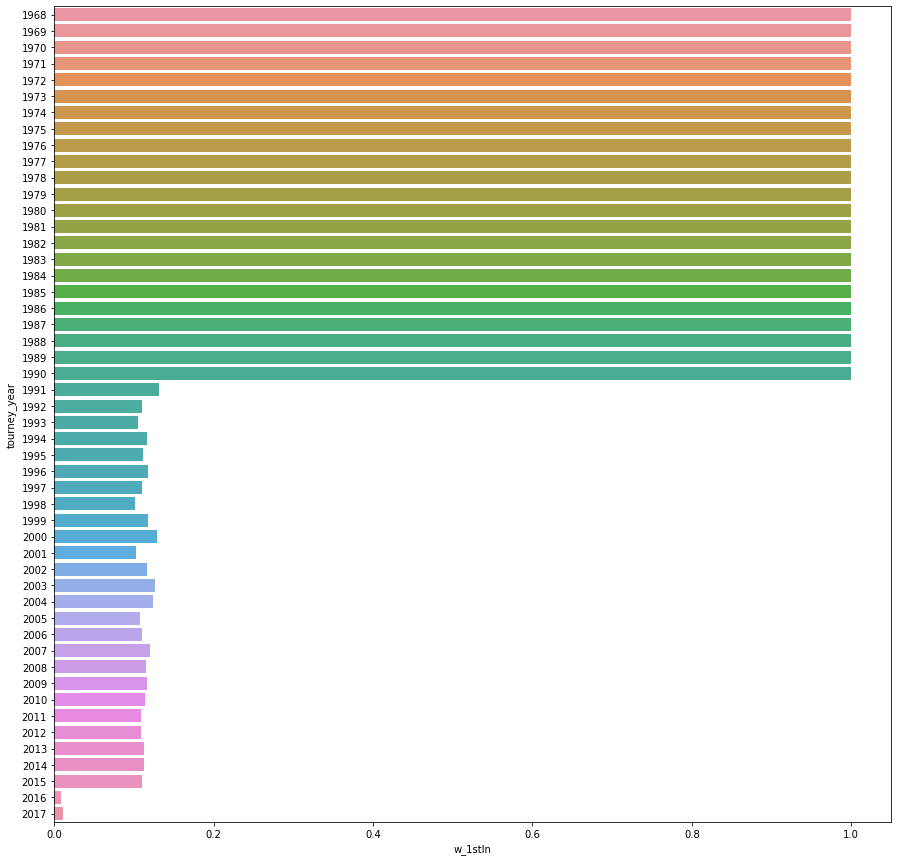

In [29]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.barplot(x="w_1stIn", y="tourney_year", data=missing_values_per_year, orient='h', ax=ax)

We can see

#### Check if period 1991 to 2003 can be considerated the same as 2004 to 2017

In [37]:
df_1991_2003 = main_df[(main_df['tourney_year'] >= 1991) & (main_df['tourney_year'] <= 2003)]

In [38]:
df_2004_2017 = main_df[(main_df['tourney_year'] >= 2004)]

In [44]:
df_1991_2003.shape, df_2004_2017.shape

((46582, 50), (42888, 50))

In [46]:
df_1991_2003['winner_rank_points'].mean()

1064.3317745563052

In [47]:
df_2004_2017['winner_rank_points'].mean()

1666.5341870300751

In [52]:
df_1991_2003.groupby('tourney_id').size().count()

2080

In [53]:
df_2004_2017.groupby('tourney_id').size().count()

2046

In [55]:
main_df.columns.values

array(['tourney_id', 'tourney_name', 'surface', 'draw_size',
       'tourney_level', 'tourney_date', 'match_num', 'winner_id',
       'winner_seed', 'winner_entry', 'winner_name', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_name', 'loser_hand', 'loser_ht', 'loser_ioc',
       'loser_age', 'score', 'best_of', 'round', 'minutes', 'w_ace',
       'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points', 'tourney_year'], dtype=object)

We will use rankings csv, to avoid considering a player with more matches more than a player that plays less

In [63]:
rankings_90 = pd.read_csv('data/atp_rankings_90s.csv')
rankings_00 = pd.read_csv('data/atp_rankings_00s.csv')
rankings_10 = pd.read_csv('data/atp_rankings_10s.csv')
rankings = pd.concat([rankings_90, rankings_00, rankings_10])

In [65]:
rankings.head()

,ranking_date,rank,player,points
0,19900101,1,100656,2913.0
1,19900101,2,101414,2279.0
2,19900101,3,101222,2111.0
3,19900101,4,100763,1398.0
4,19900101,5,100581,1354.0


In [100]:
first_date_per_year = rankings.groupby('year')['ranking_date'].min()

In [123]:
mean_by_year = rankings[rankings['ranking_date'].isin(first_date_per_year)][['ranking_date', 'points']].groupby('ranking_date').mean()

In [124]:
missing_points_by_year = rankings[rankings['ranking_date'].isin(first_date_per_year)][['ranking_date', 'points']]\
    .drop('ranking_date', axis=1).isna()\
    .groupby(rankings[rankings['ranking_date'].isin(first_date_per_year)]['ranking_date'], sort=False)\
    .apply(lambda x: x.sum()).reset_index()

In [135]:
pd.concat([
    mean_by_year.rename(columns={"points": "points_mean"}).reset_index(),
    missing_points_by_year.rename(columns={"points": "missing_points"}).drop('ranking_date', axis=1)
], axis=1)

,ranking_date,points_mean,missing_points
0,19900101,69.987451,0
1,19910107,105.986266,1
2,19920106,105.712423,0
3,19930104,1.334615,1025
4,19940103,2.066869,1006
5,19950102,2.272727,1003
6,19960101,2.478842,1009
7,19970106,124.315327,0
8,19980105,273.244713,931
9,19990104,118.547988,2


Years : 1993, 1994, 1995, 1996 and 1998, have a lot of missing values, we cannot replace those missing values, so we'll have to drop these years.

In [161]:
mean_by_year[~c]

,points
ranking_date,
19900101,69.987451
19910107,105.986266
19920106,105.712423
19930104,1.334615
19940103,2.066869
19950102,2.272727
19960101,2.478842
19970106,124.315327
19980105,273.244713


In [168]:
mean_by_remaining_years = mean_by_year.drop([19930104, 19940103, 19950102, 19960101, 19980105, 20190107])

In [174]:
mean_1990_2006 = mean_by_remaining_years[:12]

In [180]:
mean_1990_2006

,points
ranking_date,
19900101,69.987451
19910107,105.986266
19920106,105.712423
19970106,124.315327
19990104,118.547988
20000110,97.650541
20010101,103.336239
20020107,100.889556
20030106,97.002402


In [176]:
mean_2007_2018 = mean_by_remaining_years[12:]

In [181]:
mean_2007_2018

,points
ranking_date,
20070101,90.233064
20080107,97.016313
20090105,187.032091
20100104,129.780353
20110103,136.447804
20120102,123.216564
20130107,123.192850
20140106,114.214253
20150105,112.713107


In [183]:
mean_1990_2006.shape[0], mean_1990_2006['points'].mean(), mean_1990_2006['points'].std()

(12, 100.27054339310723, 13.785994276996389)

In [184]:
mean_2007_2018.shape[0], mean_2007_2018['points'].mean(), mean_2007_2018['points'].std()

(12, 122.98823155321907, 23.995325173544845)

In [185]:
from scipy import stats

In [191]:
# Fisher test to see if variances are equal, we rejected null hypothesis with 0.05 threshold
# According to that, we use Welch's t-test by setting equal_var parameter to False
stats.ttest_ind(mean_1990_2006['points'], mean_2007_2018['points'], equal_var=False)

Ttest_indResult(statistic=-2.8437327313736662, pvalue=0.010970143518241268)

We can see that there is a strong difference between the two populations, so we should be careful about which years we use for our analysis and machine learning model.